### **[k-평균 군집화 분석 + 그래프]**
---

#### **타깃 마케팅을 위한 소비자 군집 분석하기**

#### **0 분석 미리보기**

* 목표: 온라인 판매 데이터를 분석하여 타깃 마케팅에 필요한 소비자 군집을 구성한다.
* 핵심 개념: 타깃 마케팅, 비지도 학습, 군집화, k-평균, 엘보우 방법, 실루엣 분석
* 데이터 수집: 온라인 판매 데이터 다운로드
* 데이터 준비 및 탐색:
    1. 데이터 정제: 자료형 변환, 오류 및 중복 데이터 제거
    2. 데이터프레임의 컬럼 추출 및 분석용 데이터 생성
    3. 로그 함수를 이용한 데이터 분포 조정: 데이터 치우침 조정
* 분석 모델 구축: 사이킷런의 k-평균 군집화 모델 구축

### **1 목표설정**


머신러닝의 학습 유형에는 지도 학습과 비지도 학습이 있다.
지도 학습은 훈련 데이터에 이미 타깃값(정답)이 있어서 타깃값과 함께 학습하고 평가 데이터에 대한 예측값과 비교해 오차를 확인할 수 있다.
비지도 학습은 타깃값 없이 데이터만 있는 경우에 사용하는 것으로 학습을 통해 데이터 안에 숨겨진 패턴을 찾아 타깃값을 만들어야 한다.

군집화의 대표적인 알고리즘인 K-평균으로 온라인 판매 데이터를 분석한 후 타깃 마케팅을 위한 소비자 군집을 만드는 프로젝트를 수행해본다.
타깃 마케팅(target marketing)은 구매 행동을 가진 그룹을 세분화하여 각 특성에 맞는 마케팅을 하는 전략이다.
타깃 마케팅에서 고객 정보를 분석하고 그룹을 세분화하는 작업에 머신러닝의 군집 분석을 사용할 수 있다.

### **2 핵심 개념 이해**

* 비지도 학습: 비지도 학습(unsupervised learning)은 훈련 데이터에 타깃값이 주어지지 않은 상태에서 학습을 수행하는 방식이다. 훈련 데이터를 학습하여 모델을 생성하면서 유사한 특성(관계, 패턴 등)을 가지는 데이터를 클러스터로 구성한다. 그리고 새로운 데이터의 특성을 분석하여 해당하는 클러스터를 예측한다.

* 군집화: 군집화(clustering)는 데이터를 군집으로 구성하는 작업이다. 군집화는 군집에 대한 정보를 가지고 있지 않기 때문에 비지도 학습을 수행하여 데이터 간의 관계를 분석하고 이에 따라 유사한 데이터를 군집으로 구성한다. 군집화를 위한 대표적인 알고리즘에는 K-평균과 계층적 군집이 있다.

* k-평균 알고리즘: k-평균(k-means) 알고리즘은 k개의 클러스터를 구성하기 위한 것이다. k개의 중심점을 임의의 위치로 잡고 중심점을 기준으로 가까이 있는 데이터를 확인한 뒤 그들과의 거리(유클리디안 거리의 제곱을 사용하는 계산)의 평균 지점으로 중심점을 이동하는 방식이다. 이동한 위치에서 가까이 있는 데이터를 다시 확인하고 그들의 평균 지점으로 중심점을 이동하는 과정을 반복한다. 더 이상 이동이 발생하지 않는 위치를 찾으면 각 중심점을 기준으로 K개의 클러스터가 구성된다. 가장 많이 사용하는 군집화 알고리즘이지만, 클러스터의 수를 나타내는 k를 직접 지정해야 하는 문제가 있다. 적합한 클러스터의 수, 즉 가장 좋은 k를 찾는 데는 엘보 방법이나 실루엣 방법을 사용할 수 있다.

* 엘보 방법: 클러스터의 중심점과 클러스터 내의 데이터 거리 차이의 제곱값 합을 왜곡(distortion)이라고 한다. 엘보 방법(elbow method)은 이러한 왜곡을 이용하여 최적의 k를 찾는 것이다. 클러스터의 개수 k의 변화에 따른 왜곡 변화를 그래프로 그려보면 그래프가 꺾이는 지점인 엘보가 나타나는데, 그 지점의 k를 최적의 k로 선택한다.

* 실루엣 분석: 실루엣 분석(silhouette analysis)은 클러스터 내에 데이터가 얼마나 조밀하게 모여있는지를 측정하는 그래프 도구다. 데이터 i가 해당 클러스터 내의 데이터와 얼마나 가까운가를 나타내는 클러스터 응집력(cluster coherence)와 가장 가까운 다른 클래스터 내의 데이터와 얼마나 떨어져있는가를 나타내는 클러스터 분리도(cluster separation)를 이용하여 실루엣 계수를 계산한다. 실루엣 계수는 -1~1 사이의 값을 가지며 1에 가까울수록 좋은 군집화를 의미한다.

### **3 데이터 수집**

In [4]:
import pandas as pd
import math

In [ ]:
!pip install openpyxl

In [7]:
retail_df = pd.read_excel('./Online_Retail.xlsx')

In [8]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### **4 데이터 준비 및 탐색**

#### **4.1 데이터 정제하기**

* 데이터 정보 확인하기: 데이터에 대한 정보를 확인하기 위해 다음을 입력한다.

In [9]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


데이터를 구성하는 항목 8개는다음과 같다.

* InvoiceNo: 6자리로 정수로 이루어진 송장 번호. 'C'로 시작하는 것은 취소 주문
* StockCode: 제품 고유의 품목 코드
* Quantity: 주문 수량
* UnitPrice: 제품단가
* Country: 주문 고객의 국적
* Description: 제품 설명
* InvoiceDate: 주문 날짜와 시간
* CustomerID: 주문 고객 번호

* 데이터 정제하기: 데이터 정보를 보면 CustomerID의 자료형이 실수(float64)로 되어 있다. CustomerID는 정수 형태이므로 자료형을 정수형으로 변경해야 한다. 그리고 전체 데이터 중에서 541,909개 중에서 406,829개만 CustomerID 값이 있고 나머지는 없는데, 추가로 Quantity와 UnitPrice가 음수인 것도 제거한다.

In [10]:
# 오류 데이터 정제
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]

In [11]:
# CustomerID 자료형을 정수형으로 변환
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [12]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


In [13]:
print(retail_df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [14]:
print(retail_df.shape)

(397884, 8)


In [15]:
# 중복 레코드 제거
retail_df.drop_duplicates(inplace=True)

In [16]:
print(retail_df.shape)  # 작업 확인용 출력

(392692, 8)


#### **4.2 데이터프레임의 컬럼 추출 및 분석용 데이터 생성하기**

* 데이터 탐색을 위해 제품 수, 거래 건수, 고객 수를 알아보고 고객의 국적도 확인해본다.

In [17]:
pd.DataFrame([{
    'Product': len(retail_df['StockCode'].value_counts()),
    'Transaction': len(retail_df['InvoiceNo'].value_counts()),
    'Customer': len(retail_df['CustomerID'].value_counts())
}], columns=['Product', 'Transaction', 'Customer'], index=['counts'])

,Product,Transaction,Customer
counts,3665,18532,4338


In [18]:
retail_df['Country'].value_counts()

Country
United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


* 마케팅에 이용하기 위해 고객의 주문 횟수, 주문 총액, 그리고 마지막 주문 후 며칠이 지났는지에 대한 정보를 추출해본다.

In [19]:
# 주문 금액 컬럼 추출
retail_df['SaleAmount'] = retail_df['UnitPrice'] * retail_df['Quantity']

In [20]:
retail_df.head()    # 작업 확인용 출력

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [23]:
aggregations = {
    'InvoiceNo': 'count',
    'SaleAmount': 'sum',
    'InvoiceDate': 'max',
}

In [24]:
customer_df = retail_df.groupby('CustomerID').agg(aggregations)
customer_df = customer_df.reset_index()

In [25]:
customer_df.head()  # 작업 확인용 출력

,CustomerID,InvoiceNo,SaleAmount,InvoiceDate
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


In [33]:
customer_df = customer_df.rename(
    columns={
        'InvoiceNo': 'Freq',
        'InvoiceDate': 'ElapsedDays',
    }
)

In [34]:
customer_df.head()  # 작업 확인용 출력

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,2011-01-18 10:01:00
1,12347,182,4310.00,2011-12-07 15:52:00
2,12348,31,1797.24,2011-09-25 13:13:00
3,12349,73,1757.55,2011-11-21 09:51:00
4,12350,17,334.40,2011-02-02 16:01:00


* 마지막 주문일로부터 며칠이 지났는지에 대한 값을 ElapsedDays 컬럼에 저장해야 한다. 이 값은 '기준 날짜 - 마지막 구매일'로 계산해 구한다. 분석 중인 데이터의 기준 날짜는 2011년 12월 10일이다.

In [31]:
import datetime

In [35]:
customer_df['ElapsedDays'] = datetime.datetime(2011,12,10) - customer_df['ElapsedDays']

In [36]:
customer_df.head()  # 작업 확인용 출력

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,325 days 13:59:00
1,12347,182,4310.00,2 days 08:08:00
2,12348,31,1797.24,75 days 10:47:00
3,12349,73,1757.55,18 days 14:09:00
4,12350,17,334.40,310 days 07:59:00


In [37]:
customer_df['ElapsedDays'] = customer_df['ElapsedDays'].apply(lambda x: x.days + 1)

In [38]:
customer_df.head()  # 작업 확인용 출력

,CustomerID,Freq,SaleAmount,ElapsedDays
0,12346,1,77183.60,326
1,12347,182,4310.00,3
2,12348,31,1797.24,76
3,12349,73,1757.55,19
4,12350,17,334.40,311


### **4.3 데이터 분포 조정하기**

* 데이터 준비의 마지막 작업으로 데이터 값이 한쪽으로 치우치지 않았는지 박스플롯 그래프로 확인하고 조정해본다.

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

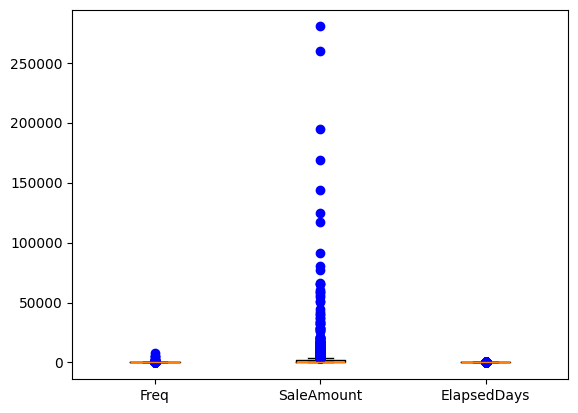

In [41]:
fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq'], customer_df['SaleAmount'], customer_df['ElapsedDays']], sym='bo')
plt.xticks([1, 2, 3], ['Freq', 'SaleAmount','ElapsedDays' ])

plt.show()

* 파란색 점으로 표시된 sym='bo' 아웃레이어 값이 많은 것은 데이터 값이 고르게 분포하지 않고 치우쳐 있다는 것을 나타낸다. 값이 한쪽으로 치우쳐 있으면 분석 결과가 정확하다고 할 수 없으므로 로그 함수를 적용하여 값의 분포를 고르게 조정해야 한다.

In [42]:
import numpy as np

In [43]:
customer_df['Freq_log'] = np.log1p(customer_df['Freq'])
customer_df['SaleAmount_log'] = np.log1p(customer_df['SaleAmount'])
customer_df['ElapsedDays_log'] = np.log1p(customer_df['ElapsedDays'])

In [44]:
customer_df.head()  # 작업 확인용 출력

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log
0,12346,1,77183.60,326,0.693147,11.253955,5.789960
1,12347,182,4310.00,3,5.209486,8.368925,1.386294
2,12348,31,1797.24,76,3.465736,7.494564,4.343805
3,12349,73,1757.55,19,4.304065,7.472245,2.995732
4,12350,17,334.40,311,2.890372,5.815324,5.743003


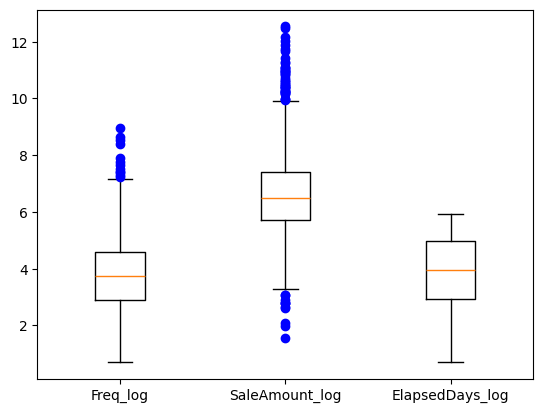

In [46]:
fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq_log'], customer_df['SaleAmount_log'], customer_df['ElapsedDays_log']], sym='bo')
plt.xticks([1, 2, 3], ['Freq_log', 'SaleAmount_log','ElapsedDays_log' ])

plt.show()

로그 함수를 취하여 수정한 값에 대한 박스플롯을 보면 이전보다 아웃레이어가 줄어들고 모양도 균형이 잡힌 것 같다. 완벽하지는 않지만 이정도로 만족하고 데이터 탐색 작업을 마치도록 한다.

### **5 분석 모델 구축**

#### **5.1 k-평균 군집화 모델을 이용하여 분석 모델 구축하기**

타깃 마케팅을 위한 소비자 군집화를 위해 사이킷런의 k-평균 군집화 모델인 KMeans를 이용하여 분석 모델을 구축한다.

* X-features를 정규 분포로 스케일링하기

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [48]:
x_features = customer_df[
    ['Freq_log', 'SaleAmount_log', 'ElapsedDays_log']
].values

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
x_features_scaled = StandardScaler().fit_transform(x_features)

* 엘보 방법으로 클러스터 개수 K 선택하기: K-평균 모델에 적당한 클러스터 개수 K를 엘보 방법을 사용하여 구한다. 클러스터 개수를 1~10개까지 변화시키면서 왜곡의 크기 변화를 그래프로 나타내어 엘보 지점을 찾아본다.

In [51]:
distortions = []

for i in range(1, 11):
    kmeans_i = KMeans(n_clusters=i, random_state=0) # 모델 생성
    kmeans_i.fit(x_features_scaled) # 모델 훈련
    distortions.append(kmeans_i.inertia_)

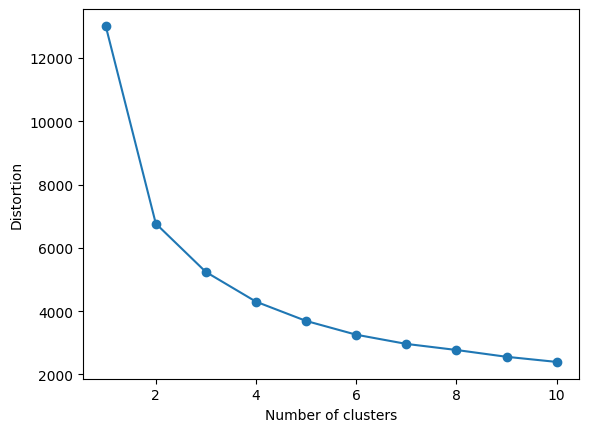

In [53]:
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

* k-그래프를 보면 엘보라고 할 수 있는 지점이 3 또는 4, 5가 될 수 있을 것 같다. 여기에서는 클러스터의 개수 k를 3으로 설정하여 k-평균 모델을 다시 구축한 뒤 모델에서 만든 클러스터 레이블을 확인한다.

In [54]:
kmeans = KMeans(n_clusters=3, random_state=0)   # 모델 생성
# 모델 학습과 결과 예측(클러스터 레이블 생성)
Y_labels = kmeans.fit_predict(x_features_scaled)

In [55]:
customer_df['ClusterLabel'] = Y_labels

In [56]:
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,326,0.693147,11.253955,5.789960,2
1,12347,182,4310.00,3,5.209486,8.368925,1.386294,1
2,12348,31,1797.24,76,3.465736,7.494564,4.343805,2
3,12349,73,1757.55,19,4.304065,7.472245,2.995732,2
4,12350,17,334.40,311,2.890372,5.815324,5.743003,0


### **6 결과 분석 및 시각화**

#### **6.1 클러스터의 비중과 데이터 분포를 차트로 시각화하기**

k-평균 군집화 모델의 성능은 클러스터 개수가 중요한 요인이다. 엘보 방법을 사용해 클러스터 개수 k를 3으로 지정했지만, 최적의 클러스터 수라고 확신하기에는 애매하다. 실루엣 계수가 높은지, 각 클러스터의 비중이 고르게 구성되었는지를 분석하여 최적의 클러스터 개수를 구해본다. 클러스터의 비중과 데이터 분포를 쉽게 확인하기 위해 그래프 시각화를 사용한다.

* 먼저, 각 클러스터의 비중을 가로 바 차트로 시각화한다.

In [57]:
from matplotlib import cm

In [60]:
def silhouetteViz(n_cluster, X_features): 
    
    kmeans = KMeans(n_clusters=n_cluster, random_state=0, n_init='auto')
    Y_labels = kmeans.fit_predict(X_features)
    
    silhouette_values = silhouette_samples(X_features, Y_labels, metric='euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouettes)
    
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title('Number of Cluster : '+ str(n_cluster)+'\n' \
              + 'Silhouette Score : '+ str(round(silhouette_avg,3)))
    plt.yticks(y_ticks, range(n_cluster))   
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

* 클러스터의 데이터 분포를 확인하기 위해 스캐터 차트로 시각화한다.

In [61]:
def clusterScatter(n_cluster, X_features): 
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=0, n_init='auto')
    Y_labels = kmeans.fit_predict(X_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i) / n_cluster) #클러스터의 색상 설정
        c_colors.append(c_color)
        #클러스터의 데이터 분포를 동그라미로 시각화
        plt.scatter(X_features[Y_labels == i,0], X_features[Y_labels == i,1],
                     marker='o', color=c_color, edgecolor='black', s=50, 
                     label='cluster '+ str(i))       
    
    #각 클러스터의 중심점을 삼각형으로 표시
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], 
                    marker='^', color=c_colors[i], edgecolor='w', s=200)
        
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

* 생성한 그래프를 고려하여 클러스터 개수가 3, 4, 5, 6인 경우의 실루엣 계수와 각 클러스터의 비중, 그리고 데이터 분포를 시각화하여 비교해본다.

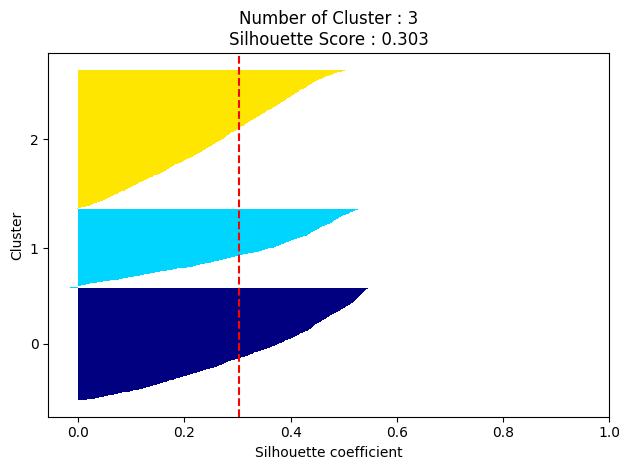

In [62]:
silhouetteViz(3, x_features_scaled)

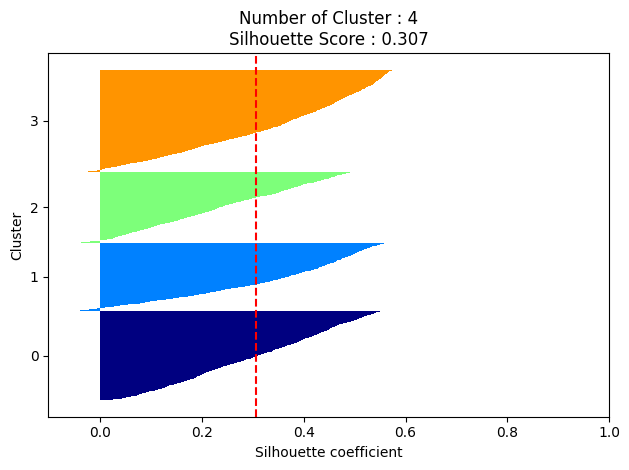

In [63]:
silhouetteViz(4, x_features_scaled)

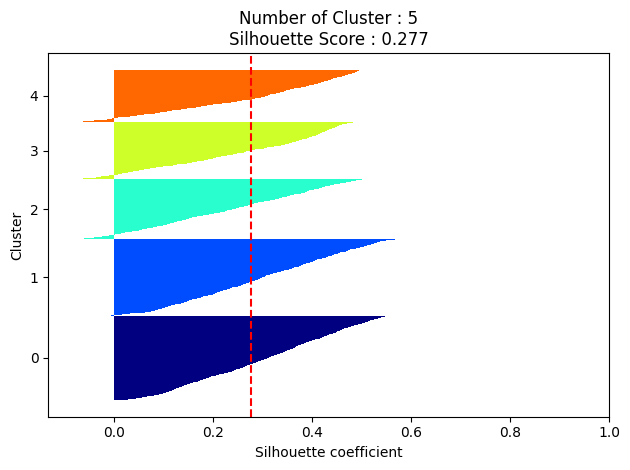

In [64]:
silhouetteViz(5, x_features_scaled)

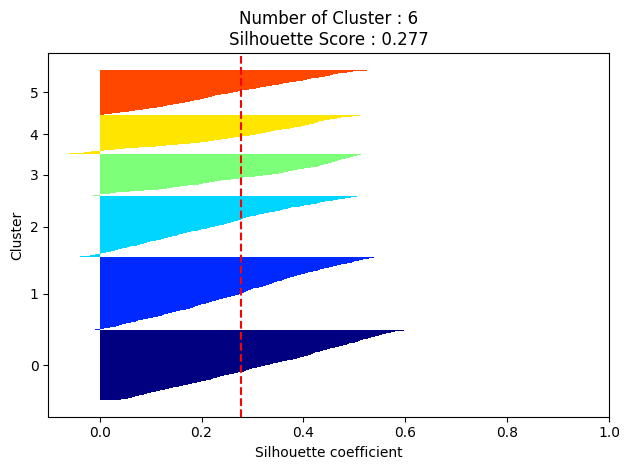

In [65]:
silhouetteViz(6, x_features_scaled)

* 클러스터의 비중이 한쪽으로 치우치지 않고 비슷하면서 실루엣 계수가 높은 것은 클러스터가 4개인 경우로 실루엣 계수는 0.307이다.

* 이번에는 클러스터 분포를 이용하여 최적의 클러스터 수를 확인한다.

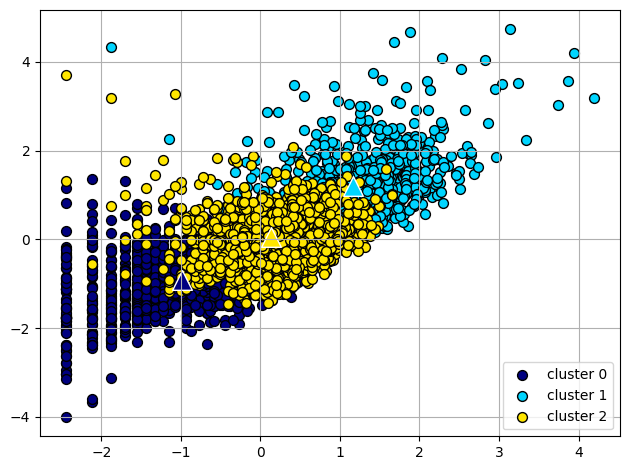

In [66]:
clusterScatter(3, x_features_scaled)

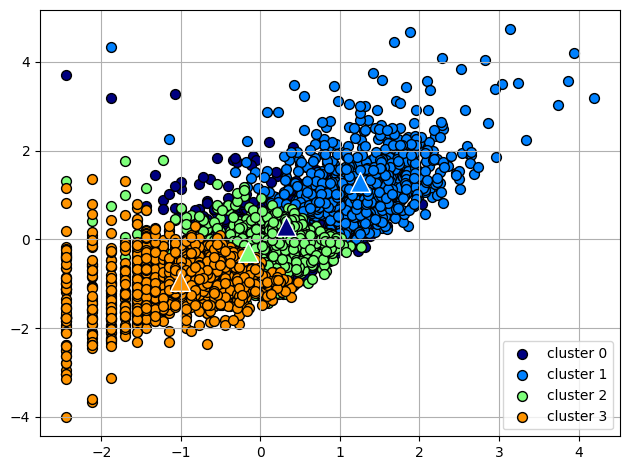

In [67]:
clusterScatter(4, x_features_scaled)

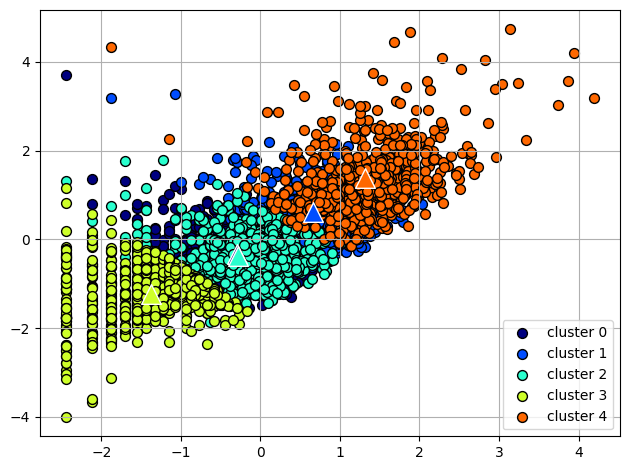

In [68]:
clusterScatter(5, x_features_scaled)

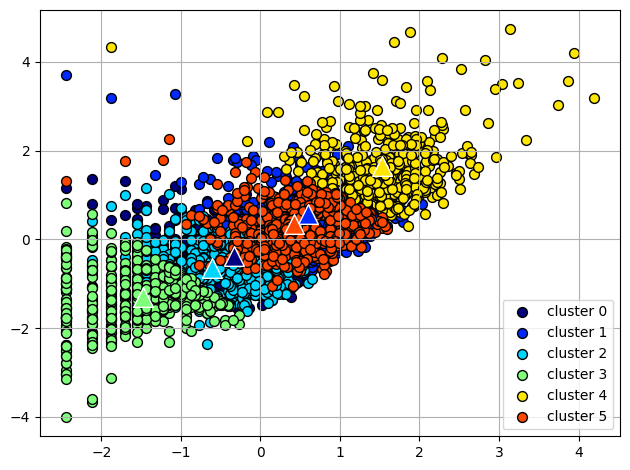

In [69]:
clusterScatter(6, x_features_scaled)

* 데이터가 섞이지 않고 같은 클러스터끼리 모여있는 형태가 되면 군집화가 잘된 것으로 한단한다. 클러스터가 3개인 경우와 4개인 경우가 비슷하게 좋아 보이는데 silhouetteViz 함수를 호출한 결과에서 클러스터가 4개인 경우가 더 좋은 것으로 나타났으므로 최종적으로 최적의 클래스터 개수 k를 4로 결정하기로 한다. 

In [70]:
best_cluster = 4
kmeans = KMeans(
    n_clusters=best_cluster,
    random_state=0,
)
Y_labels = kmeans.fit_predict(x_features_scaled)

In [71]:
customer_df['ClusterLabel'] = Y_labels

In [72]:
customer_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays,Freq_log,SaleAmount_log,ElapsedDays_log,ClusterLabel
0,12346,1,77183.60,326,0.693147,11.253955,5.789960,0
1,12347,182,4310.00,3,5.209486,8.368925,1.386294,1
2,12348,31,1797.24,76,3.465736,7.494564,4.343805,0
3,12349,73,1757.55,19,4.304065,7.472245,2.995732,1
4,12350,17,334.40,311,2.890372,5.815324,5.743003,3


In [73]:
customer_df.to_csv('./Online_Retail_Customer_Cluster.csv')

#### **6.2 추가 분석하기**

이렇게 구성된 소비자 군집, 즉 소비자 클러스터를 이용해 타깃 마케팅 전략을 세우려면 추가 분석이 필요하다. 각 클러스터의 특징을 간단하게 살펴본다.

* 클러스터의 특징을 살펴보기 위해 먼저 ClusterLabel을 기준으로 그룹을 만든다.

In [74]:
customer_df.groupby('ClusterLabel')['CustomerID'].count()

ClusterLabel
0    1167
1     900
2     931
3    1340
Name: CustomerID, dtype: int64

* 고객 클러스터에서 총 구매 빈도와 총 구매 금액, 마지막 구매 이후 경과일 정보를 추출하고, 구매 1회당 평균 구매 금액도 계산해본다.

In [75]:
customer_cluster_df = customer_df.drop(
    ['Freq_log', 'SaleAmount_log', 'ElapsedDays'],
    axis=1,
    inplace=False,
)

In [76]:
# 주문 1회당 평균 구매금액: SaleAmountAvg
customer_cluster_df['SaleAmountAvg'] = customer_cluster_df['SaleAmount'] / customer_cluster_df['Freq']

In [77]:
customer_cluster_df.head()

,CustomerID,Freq,SaleAmount,ElapsedDays_log,ClusterLabel,SaleAmountAvg
0,12346,1,77183.60,5.789960,0,77183.600000
1,12347,182,4310.00,1.386294,1,23.681319
2,12348,31,1797.24,4.343805,0,57.975484
3,12349,73,1757.55,2.995732,1,24.076027
4,12350,17,334.40,5.743003,3,19.670588


In [78]:
customer_cluster_df.drop(
    ['CustomerID'],
    axis=1,
    inplace=False,
).groupby(
    'ClusterLabel'
).mean()

,Freq,SaleAmount,ElapsedDays_log,SaleAmountAvg
ClusterLabel,,,,
0,74.443873,1453.809907,4.463390,106.760512
1,275.008889,6901.516111,2.411961,94.322099
2,41.978518,643.460173,2.842557,31.243547
3,14.347761,283.721501,5.004879,43.337452
